# Import Libraries

In [471]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# Load Dataset

In [473]:
df = pd.read_excel('./Real estate valuation data set.xlsx')

In [474]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


# Drop non-important columns and rename columns

In [476]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [477]:
df.drop(['No','X1 transaction date'],axis=1,inplace=True)

In [478]:
df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [479]:
df.columns=['house_age','nearest_station','stores','latitude','longitude','price']

# Data Exploration

In [481]:
df.shape

(414, 6)

In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   house_age        414 non-null    float64
 1   nearest_station  414 non-null    float64
 2   stores           414 non-null    int64  
 3   latitude         414 non-null    float64
 4   longitude        414 non-null    float64
 5   price            414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


In [483]:
df.isna().sum()

house_age          0
nearest_station    0
stores             0
latitude           0
longitude          0
price              0
dtype: int64

In [484]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
house_age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
nearest_station,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
price,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


In [485]:
df.corr()

,house_age,nearest_station,stores,latitude,longitude,price
house_age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
nearest_station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
price,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


# Data Visualization

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

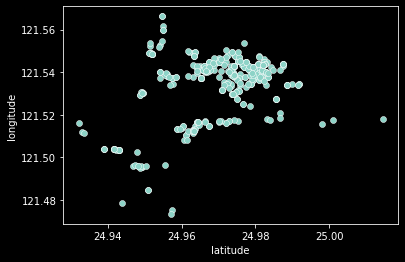

In [487]:
sns.scatterplot(y='longitude',x='latitude',data=df)

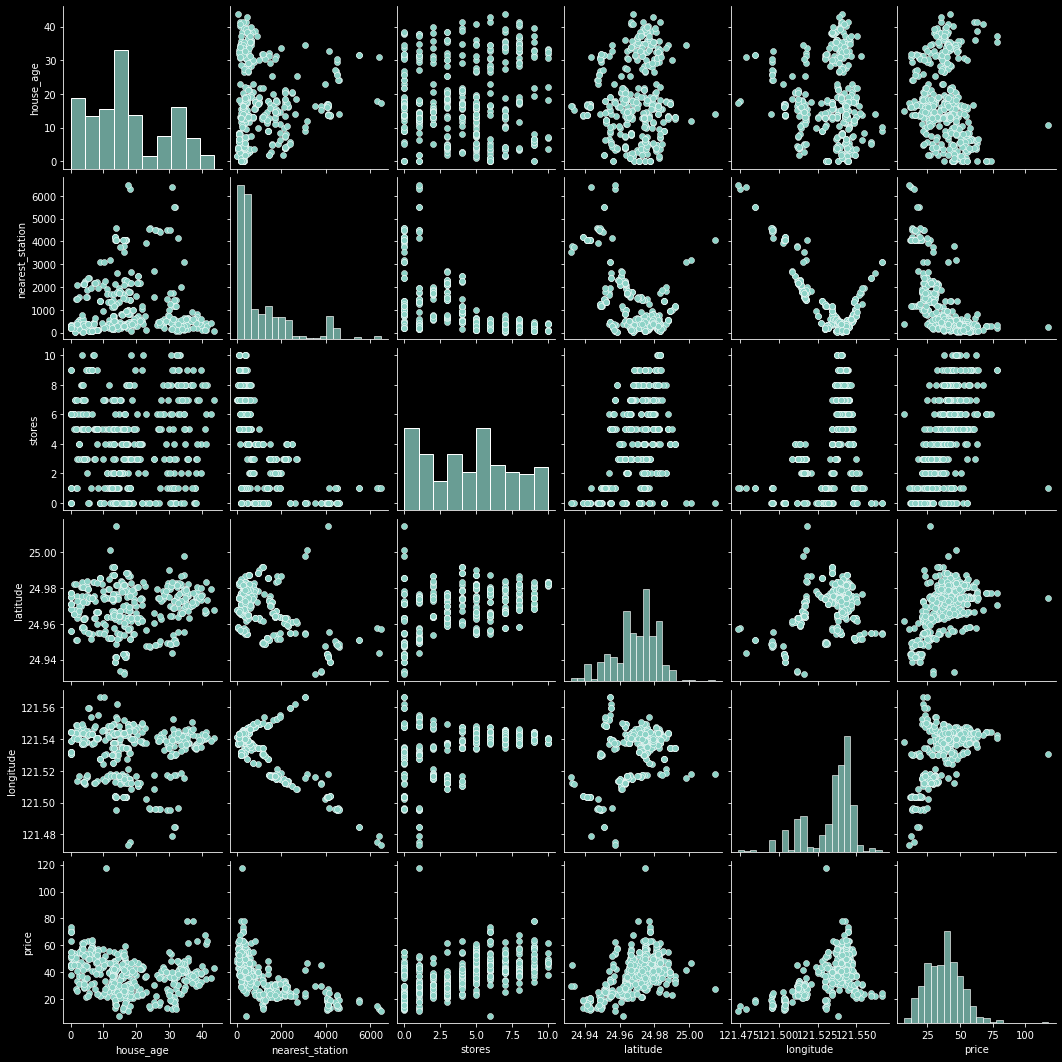

In [488]:
sns.pairplot(df)

# Data spilt

In [490]:
x=df.drop('price',axis=1).values
y=df['price'].values

In [491]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=100,shuffle=True)

# Data Engineering

In [493]:
pca=PCA(n_components=1)
train_x_pca=pca.fit_transform(train_x)

In [494]:
train_x_pca=train_x_pca.flatten()

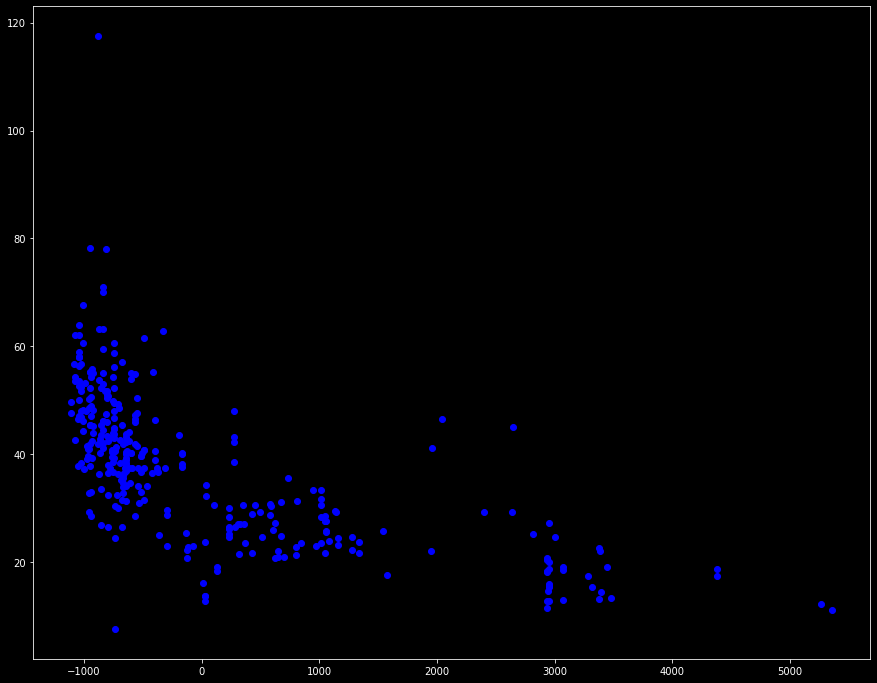

In [495]:
plt.style.use('dark_background')
plt.figure(figsize=(15,12))
plt.plot(train_x_pca,train_y,'bo')

In [496]:
poly=PolynomialFeatures(degree=2)
new_train_x=poly.fit_transform(train_x)

In [497]:
new_test_x=poly.transform(test_x)

# Model

In [499]:
lm = LinearRegression().fit(new_train_x,train_y)

In [500]:
pred=lm.predict(new_test_x)

# Accuracy

In [502]:
r2_score(pred,test_y)

0.6881712261218402

In [503]:
mean_absolute_error(pred,test_y)

5.076961015088552

In [504]:
mean_squared_error(pred,test_y)

38.62497213303055